### Q1: *Sentiment Analysis and Action Extraction*

*Set up Instructions*

To install dependences and run this notebook:

```bash
poetry install 
```

To update delta files with your own experiment (optional): 

1. *Deploy Azure AI Studio/ Azure Machine Learning*
2. *Deploy gpt-4o model, and increase token limits to reduce throttling*
3. *Update .env file*
4. run "poetry run s_a"

```bash
poetry run s_a
```

*Diplay Results from Sentiment Analysis and Action Extraction*

In [1]:
from deltalake import DeltaTable
df_delta = DeltaTable('./../data/sentiment_analysis/delta').to_pandas()
df_delta.head(10)

,file_name,file_content,sentiment,actions
0,transcript_0.txt,"Member: Hi, I'm calling to get a case pre-auth...",neutral,"{'actionItems': [{'owner': '', 'actionItem': '..."
1,transcript_1.txt,"Member: Hi, I'm calling about a denied claim I...",negative,"{'actionItems': [{'owner': 'Customer Support',..."
2,transcript_10.txt,"Member: Hi, I'm calling to schedule an appoint...",positive,{'actionItems': []}
3,transcript_100.txt,"Member: Hi, I'm calling about a denied claim I...",positive,"{'actionItems': [{'owner': 'Customer support',..."
4,transcript_101.txt,"Member: Hi, I'm calling to schedule an appoint...",positive,"{'actionItems': [{'owner': 'Customer Support',..."
5,transcript_102.txt,"Member: Hi, I'm having trouble registering and...",neutral,{'actionItems': [{'owner': 'Technical Support'...
6,transcript_103.txt,"Member: Hi, I'm calling about a claim that was...",positive,{'actionItems': [{'owner': 'Policy update team...
7,transcript_104.txt,"Member: Hi, I'm calling to get a case pre-auth...",neutral,{'actionItems': []}
8,transcript_105.txt,"Member: Hi, I'm calling about a denied claim I...",neutral,"{'actionItems': [{'owner': 'Customer Support',..."
9,transcript_106.txt,"Member: Hello, I'm having some trouble registe...",positive,{'actionItems': []}


*Granular view of senitment and actions*

In [2]:
from data.visualize import get_granualar_view_sentiment_and_actions

num_conversations = 2  # Number of customer conversations to inspect
get_granualar_view_sentiment_and_actions(num_conversations=num_conversations, df_delta=df_delta)

Conversation no.: 1

File Content: Member: Hi, I'm calling to get a case pre-authorized. My name is Emily Wilson and my member ID is 
MEM456789.

PA Agent: Hi Emily, thank you for calling PA customer care. Can you please confirm your date of birth for 
verification purposes?
Member: It's March 12, 1985.
PA Agent: Thank you, Emily. Can you please provide me with some details about the case you're seeking 
pre-authorization for? What's the nature of the treatment or service you're looking to receive?
Member: I'm scheduled to undergo an MRI scan for a knee injury. My doctor's office has already submitted the 
request, but I wanted to confirm the status and ensure that it's covered under my plan.
PA Agent: I apologize for the delay, Emily. Let me just check on the status of your request. Can you please hold 
for just a moment?
Member: Sure, thank you.
PA Agent: Thank you for holding, Emily. I've located your request and I'm reviewing the details now. Can you please
confirm the name of your doctor and the facility where the MRI scan is scheduled to take place?
Member: My doctor's name is Dr. Smith and the facility is Oakwood Medical Center.
PA Agent: Thank you, Emily. I've verified the information and I'm checking your eligibility now. Can you please 
hold for just another moment?
Member: Okay.
PA Agent: Thank you for holding, Emily. I've checked your eligibility and it appears that you do have coverage for 
the MRI scan under your plan. However, I need to escalate this request to our medical review team for further 
evaluation.
Member: Okay, what does that mean?
PA Agent: It means that our medical review team will review your case and make a determination regarding 
pre-authorization. I apologize, but I won't be able to provide a decision today. We'll be in touch with you within 
the next 3-5 business days to let you know the outcome.
Member: Okay, that sounds good. Can you give me a reference number for this case so I can follow up if needed?
PA Agent: Yes, certainly. Your case number is PA001234. You can use this number to follow up on the status of your 
request.
Member: Great, thank you for your help.
PA Agent: You're welcome, Emily. We'll be in touch soon. Is there anything else I can assist you with today?
Member: No, that's all. Thank you.
PA Agent: You're welcome. Have a great day.

   1 {                                                                                                             
   2     "actionItems": [                                                                                          
   3         {                                                                                                     
   4             "owner": "",                                                                                      
   5             "actionItem": "Inform Emily Wilson of the decision regarding the MRI scan request",               
   6             "dueDate": "3-5 business days",                                                                   
   7             "status": "Open",                                                                                 
   8             "notes": "The request has been escalated to the medical review team."                             
   9         }                                                                                                     
  10     ]                                                                                                         
  11 }                                                                                                             

Predicted Sentiment: neutral.

Conversation no.: 2

File Content: Member: Hi, I'm calling about a denied claim I received for my recent medical service. I was told 
that my policy doesn't cover it, but I'm certain it should be covered under my new policy. My member ID is 
MEM123456.

Customer Support: I apologize for the inconvenience, MEM123456. Can you please provide me with more information 
about the denied claim, such as the claim number and the date of service?
Member: The claim number is CLM789012, and the date of service was February 10th.
Customer Support: Thank you for providing that information. I've located your claim in our system. Can you tell me 
more about the new policy you're referring to? When did you switch policies?
Member: I switched policies on January 1st. I was told that the new policy would cover the service I received, but 
the denial letter says it's not covered.
Customer Support: I understand your concern. Let me check on the status of your policy update in our system. 
(pause) I apologize, but it appears that your new policy has not been updated in our system. This is likely the 
reason why your claim was denied.
Member: That's frustrating. How can we get this resolved?
Customer Support: I'm going to go ahead and connect you with our policy update team. They'll be able to assist in 
updating your policy and reprocessing your claim. Please hold for just a moment.
(pause)
Customer Support: You're now connected with our policy update team. They'll take care of updating your policy and 
getting your claim approved. Is there anything else I can assist you with in the meantime?
Member: No, that's all. Thank you for your help.
Customer Support: You're welcome, MEM123456. We apologize again for the mistake and appreciate your patience. The 
policy update team will be in touch with you shortly to confirm the status of your claim.
Member: Thank you.
Customer Support: You're welcome. Have a great day.
Call duration: 9 minutes

   1 {                                                                                                             
   2     "actionItems": [                                                                                          
   3         {                                                                                                     
   4             "owner": "Customer Support",                                                                      
   5             "actionItem": "Connect member with the policy update team to resolve the issue and reprocess the c
   6             "dueDate": "",                                                                                    
   7             "status": "In Progress",                                                                          
   8             "notes": "Member ID: MEM123456, Claim Number: CLM789012, Date of Service: February 10th"          
   9         },                                                                                                    
  10         {                                                                                                     
  11             "owner": "Policy Update Team",                                                                    
  12             "actionItem": "Assist and confirm the claim status with the member",                              
  13             "dueDate": "",                                                                                    
  14             "status": "Open",                                                                                 
  15             "notes": "Member expressed frustration, ensure to provide confirmation soon"                      
  16         }                                                                                                     
  17     ]                                                                                                         
  18 }                                                                                                             

Predicted Sentiment: negative.

*Sentiment Evaluation*

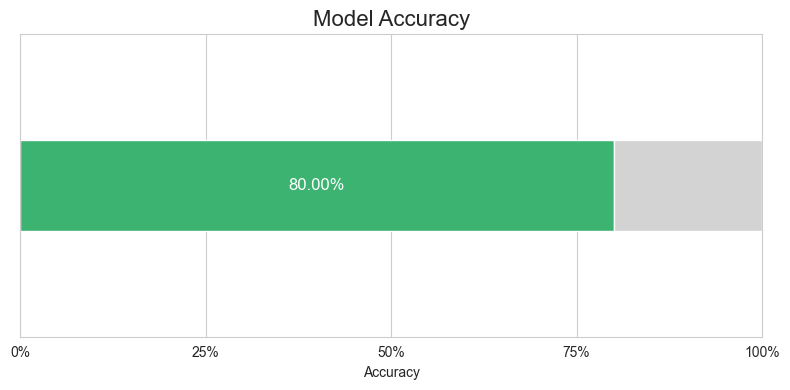

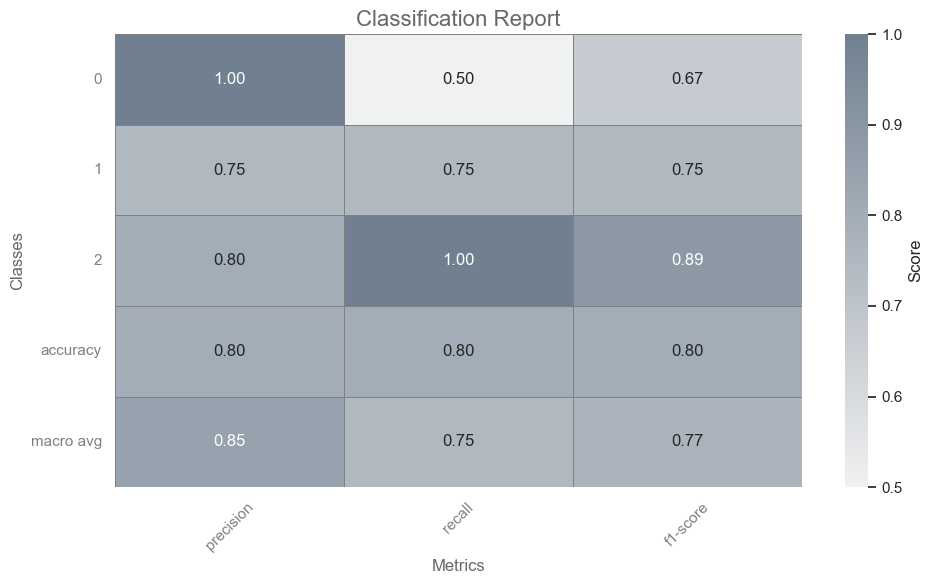

In [6]:
from llmops.eval import run_evaluation_metrics

run_evaluation_metrics(
    df_delta_path = './../data/sentiment_analysis/delta',
    df_ground_truth_path = './../data/sentiment_analysis/ground_truth/ground_truth.csv'
    )

# Evaluation of Actions

- Evaluation of Actions would require a more sophisticated approach, given it must interpret whether something is correct taking into consideration semantics. This could be achieved using capabilities within Prompt Flow or MLFlow. 
- Once the evaluation framework is in place, it allows a more principled approach to improving system performance from prompt engineering and model selection


Other Considerations
- Outputting results to Delta will allow for data versioning. Allowing LLMOps, namely reproducibility of results. 